## Quiz #0701

### "TensorFlow machine learning with Calilfornia housing data"

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.
import seaborn as sns

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#### Answer the following question by providing Python code:

In [75]:
# Bring the data.
housing_data = fetch_california_housing()

In [76]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [78]:
df = pd.DataFrame(housing_data['data'] , columns=housing_data.feature_names)
target = pd.DataFrame(housing_data.target)
df['MedHouseVal'] = target
df 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

# Building machine learning model with tensorflow

## Data preprocessing

In [79]:
#Checking missing values 
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

There is no missing values

In [80]:
#Checking the features type  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [81]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


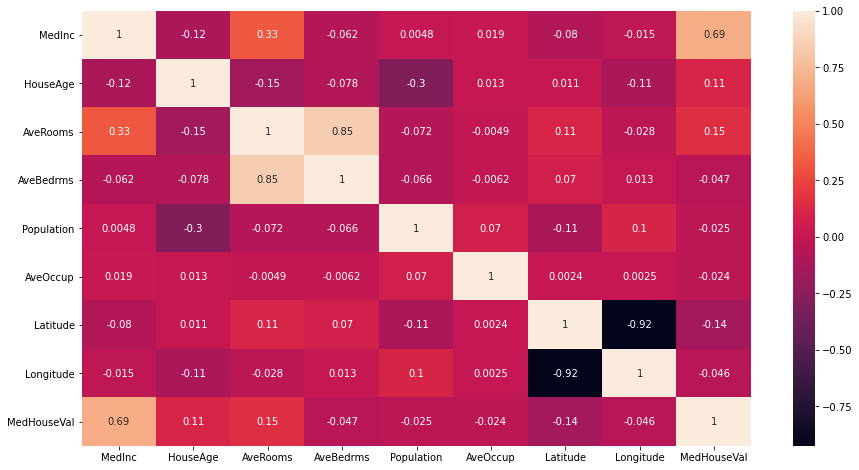

In [119]:
#Plotting the correlation matrix to display the linear relashionship between the features and the target 
plt.figure(figsize=(15,8))
corr_mat = df.corr()
sns.heatmap(corr_mat,annot=True)

The feature that is the most correlated with the target is : MedInc 

In [121]:
X = df['MedInc']
Y = df['MedHouseVal']

#Scaling the features and the target 
X_scaled = scale(X)
Y_scaled = scale(Y)

#Splitting into training and testing set 
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_scaled,test_size=0.2)

## Linear Regression model 

In [122]:
#We initialize the variables 
b1 = tf.Variable(1.0)
b0 = tf.Variable(1.0)

# we define the input x and labels y placeholders
X_ph = tf.placeholder(tf.float32,shape=(None))
y_ph= tf.placeholder(tf.float32,shape=(None))

#We define our model 
y_model= X_ph*b1 + b0

loss = tf.reduce_mean(tf.square(y_ph - y_model)) #The loss function 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001) #The optimizer 

## Training the model 

In [123]:
x_train.shape

(16512,)

In [124]:
y_train.shape

(16512,)

In [127]:
# Number of epochs (gradient descent steps).
n_epochs = 500             
# Define training                                               
train = optimizer.minimize(loss)  
# Define variable initialization                                        
init = tf.global_variables_initializer()                                  
                                                                          

with tf.Session() as sess:
        # Variables initialization.
        sess.run(init)

        # Training.
        my_feed = {X_ph:x_train, y_ph:y_train}   
        
        for i in range(n_epochs):
            sess.run(train, feed_dict = my_feed)

        # Get the final values of the Variables.
        b0_model, b1_model = sess.run([b0, b1])      
        
        # Testing.
        mse_value = sess.run(loss, feed_dict = my_feed) 

In [129]:
print("Parameters b0 = {:5.3f} , b1 = {:5.3f}".format(b0_model, b1_model))

Parameters b0 = 0.366 , b1 = 0.800


### Calculate MSE and RMSE

In [128]:
print("MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))

MSE  = 0.676
RMSE = 0.822


## Prediction

In [130]:
X_th = tf.placeholder(tf.float32)
y_model = b1_model*X_th + b0_model

In [131]:
with tf.Session() as sess:
        my_feed = {X_th:x_test}
        y_pred_value = sess.run(y_model, feed_dict = my_feed) 

### Calculate MSE and RMSE

In [137]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_pred_value)
rmse_test = np.sqrt(mse_test)
print("MSE  = {:5.3f}".format(mse_test))
print("RMSE = {:5.3f}".format(rmse_test))

MSE  = 0.658
RMSE = 0.811
